# TÉCNICAS DE APRENDIZAJE NO SUPERVISADO

Aunque en la actualidad la mayoría de las aplicaciones de Machine Learning están basadas en aprendizaje supervisado (y como resultado, es ahí donde van la mayoría de las inversiones), la gran mayoría de los datos disponibles en realidad no están etiquetados: tenemos características de entrada **X**, pero no tenemos etiquetas **y**. Yann LeCunn dijo que "si la inteligencia fuera un pastel, el aprendizaje no supervisado sería el pastel, el aprendizaje supervisado sería la guinda del pastel y el aprendizaje por refuerzo sería la cereza del pastel". En otras palabras, existe un enorme potencial en el aprendizaje no supervisado al que apenas hemos empezado a hincar el diente.

Por ejemplo, supongamos que queremos crear un sistema que tome algunas imágenes de cada artículo de una línea de producción y detecte cuáles son defectuosos. Podemos crear con bastante facilidad un sistema que tomara fotografías automáticamente, lo que nos proporcionaría miles de fotografías cada día. En solo unas pocas semanas dispondríamos de un enorme dataset. Pero espera, ¡no hay etiquetas! Si queremos entrenar un clasificador binario normal que prediga cuándo un artículo es defectuoso o no, necesitaremos etiquetar cada imagen individual como "defectuoso" o "normal". Esto normalmente requerirá que expertos humanos se sienten y revisen manualmente todas las imágenes. Esto es una tarea larga, costosa y tediosa, por lo que generalmente solo se realizará para un pequeño subconjunto de las imágenes disponibles. Como resultado, el dataset etiquetado será bastante pequeño y el rendimiento del clasificador será decepcionante. Además, cada vez que la compañía realice cambios en sus productos, será necesario reiniciar el proceso completo desde cero. ¿No sería genial si el algoritmo pudiera explotar los datos sin necesitad de que los humanos etiqueten cada imagen? Bienvenidos al aprendizaje no supervisado.

En el capítulo 8, vimos la tarea de aprendizaje no supervisado más común: la reducción dimensional. En este capítulo, veremos algunas tareas y algoritmos más de aprendizaje no supervisado:

+ *Clustering*: el objetivo es agrupar instancias similares juntas en un *cluster*. Esto es una gran herramienta para el análisis de datos, segmentación de clientes, sistemas de recomendación, motores de búsqueda, segmentación de imágenes, aprendizaje semi-supervisado, reducción dimensional y mas.

+ *Detección de anomalías*: el objetivo es aprender qué datos parecen "normales" y usar esto para detectar instancias anormales, como elementos defectuosos en una línea de producción o una nueva tendencia en series temporales.

+ *Estimación de densidad*: esta es la tarea de estimar la *función de densidad de la probabilidad* (PDF) del proceso aleatorio que generó el dataset. Se usa comunmente para la detección de anomalías: las instancias localizadas en regiones de muy baja densidad es probable que sean anomalías. También es útil para el análisis y visualización de datos.

¿Listo para un pastel? Empezaremos con el clustering, usando K-Means y DBSCAN, y después discutiremos los modelos de mezcla Gaussianos y veremos cómo pueden usarse para la estimación de densidad, clustering y detección de anomalías.

# Clustering

Mientras disfrutamos de una caminata por las montañas, nos topamos con una planta que nunca habíamos visto antes. Miramos a nuestro alrededor y nos damos cuenta de algunas más. No son exactamente idénticas, pero son lo suficientemente similares como para saber que probablemente pertenezcan a la misma especie (o al menos al mismo género). Es posible que necesitemos un botánico para que nos diga qué especie es, pero realmente no necesitamos un experto para identificar grupos de objetos que parecen similares. Esto se denomina *clustering*: es la tarea de identificar instancias similares y asignarlas a un *cluster*, es decir, grupos de instancias similares.

Como en la clasificación, cada instancia es asignada a un grupo. Sin embargo, esto es una tarea no supervisada. Consideremos la siguiente figura: a la izquierda está el dataset iris (que ya vimos en anteriores capítulos), donde cada especie de la instancia (es decir, su clase) está representada con un marcador diferente. Es un dataset etiquetado, para el cual los algoritmos de clasificación tales como el de Regresión Logística, SVM o Random Forest son muy adecuados. A la derecha está el mismo dataset, pero sin las etiquetas, por lo que ya no podemos usar un algoritmo de clasificación. Aquí es donde intervienen los algoritmos de clustering: la mayoría de ellos pueden detectar fácilmente el cluster situado más a la izquierda. También resulta fácil de ver con nuestros propios ojos, pero no es tan obvio que el cluster inferior derecho está compuesto realmente de dos sub-cluster distintos. Dicho esto, realmente el dataset tiene dos características adicionales (largo y ancho de sépalo), no representados aquí, y los algoritmos de clustering pueden hacer buen uso de todas las características, de hecho identifican bastante bien los tres clusters (por ejemplo, usando un modelo de mezcla Gaussiana, solo 5 instancias de las 150 son asignadas a un cluster erróneo).

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(42)

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

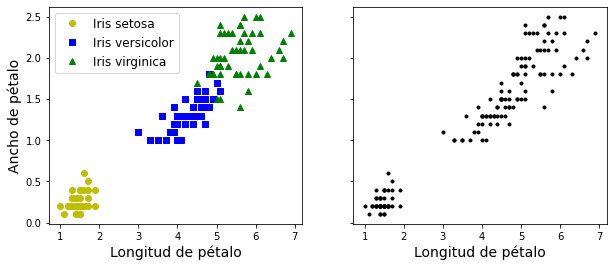

In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Longitud de pétalo", fontsize=14)
plt.ylabel("Ancho de pétalo", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Longitud de pétalo", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()